<a href="https://colab.research.google.com/github/lesya7maltseva/Pandas-Statistics-/blob/main/%D0%A1%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B0_%D0%B4%D0%B0%D1%82%D0%B0_%D1%81%D0%B5%D1%82_%D0%98%D1%80%D0%B8%D1%81%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [ ]:
# 1.
irises = load_iris()

In [ ]:
# 2.
iris_data = pd.DataFrame(irises.data, columns = irises.feature_names)
iris_data = iris_data.iloc[:,0:2]
iris_data_class = irises.target

In [ ]:
iris_data

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [ ]:
iris_data_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
# 3. разделяем выборку на тестовую и тренировочную
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_data_class, random_state= 27)

In [ ]:
# 4.
lda = LinearDiscriminantAnalysis()

In [ ]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
# Прогнозируем результат с помощью дискриминантного анализа
lda.predict(X_test)

array([2, 0, 2, 2, 1, 2, 1, 2, 2, 0, 1, 2, 0, 1, 2, 1, 0, 2, 1, 2, 2, 0,
       1, 0, 2, 1, 1, 0, 2, 2, 2, 0, 2, 1, 2, 0, 2, 2])

In [ ]:
lda.coef_

array([[-5.87001838,  7.19824696],
       [ 1.87863555, -3.98423957],
       [ 4.9439964 , -4.33415716]])

In [ ]:
small_train = X_train[['sepal length (cm)','sepal width (cm)']]
small_test = X_test[['sepal length (cm)','sepal width (cm)']]

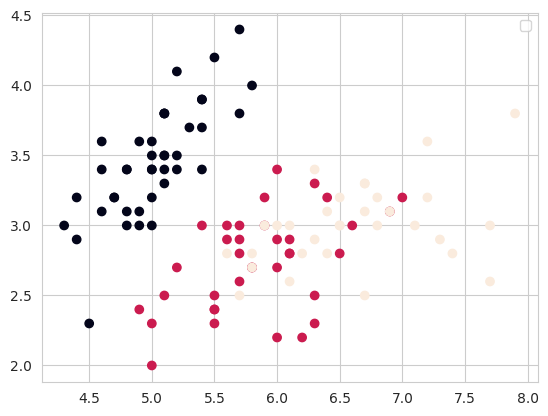

In [ ]:
plt.scatter(x = small_train['sepal length (cm)'], y = small_train['sepal width (cm)'], c = y_train)
plt.legend()
plt.show()

In [ ]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
lda_small.means_

array([[5.01463415, 3.45609756],
       [5.85555556, 2.73888889],
       [6.56857143, 2.98      ]])

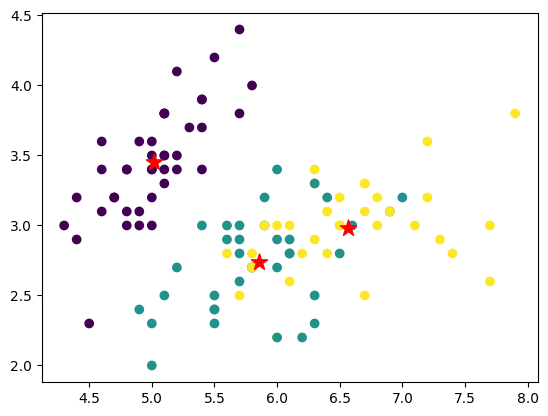

In [ ]:
# визуализируем тренировочные данные
plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c = y_train)

# центры:
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1],c = 'r', s = 150, marker = '*')

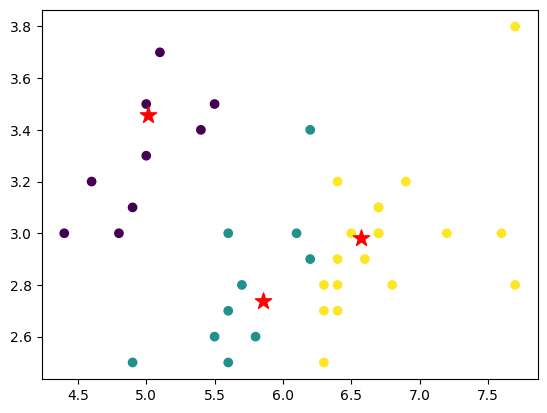

In [ ]:
# 6.
# визулизируем тестовые данные
plt.scatter(small_test['sepal length (cm)'],small_test['sepal width (cm)'], c = lda_small.predict(small_test))
# центры:
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1],c = 'r', s = 150, marker = '*')

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

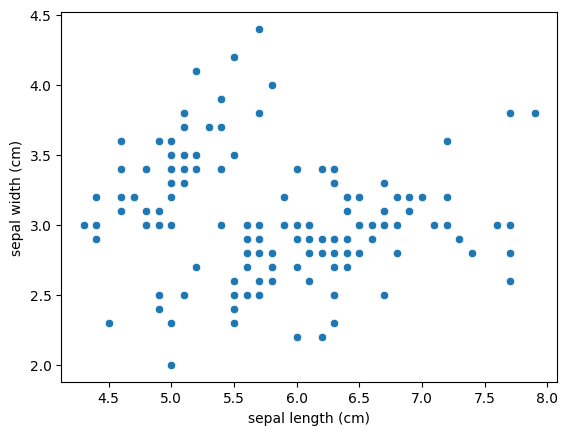

In [ ]:
X = iris_data[['sepal length (cm)','sepal width (cm)']]
sns.scatterplot(x = iris_data['sepal length (cm)'],y = iris_data['sepal width (cm)'])

In [ ]:
# 7.
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
# приводим данные к единому масштабу
scaller = StandardScaler()

In [ ]:
# обучаем модель
X_scaller = scaller.fit_transform(X)
X_scaller

array([[-0.90068117,  1.01900435],
       [-1.14301691, -0.13197948],
       [-1.38535265,  0.32841405],
       [-1.50652052,  0.09821729],
       [-1.02184904,  1.24920112],
       [-0.53717756,  1.93979142],
       [-1.50652052,  0.78880759],
       [-1.02184904,  0.78880759],
       [-1.74885626, -0.36217625],
       [-1.14301691,  0.09821729],
       [-0.53717756,  1.47939788],
       [-1.26418478,  0.78880759],
       [-1.26418478, -0.13197948],
       [-1.87002413, -0.13197948],
       [-0.05250608,  2.16998818],
       [-0.17367395,  3.09077525],
       [-0.53717756,  1.93979142],
       [-0.90068117,  1.01900435],
       [-0.17367395,  1.70959465],
       [-0.90068117,  1.70959465],
       [-0.53717756,  0.78880759],
       [-0.90068117,  1.47939788],
       [-1.50652052,  1.24920112],
       [-0.90068117,  0.55861082],
       [-1.26418478,  0.78880759],
       [-1.02184904, -0.13197948],
       [-1.02184904,  0.78880759],
       [-0.7795133 ,  1.01900435],
       [-0.7795133 ,

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

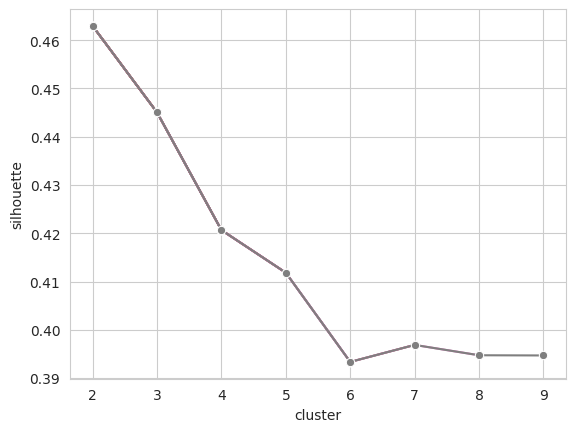

In [ ]:
# расчет количества кластеров с использованием метода силуэта
from sklearn.metrics import silhouette_score
def get_siluet (cluster_num, X):
  k_means = KMeans(n_clusters= cluster_num, random_state = 27)
  k_means.fit(X)
  silhouette = silhouette_score(X, k_means.predict(X))
  return silhouette
# словарь для датафрэйма
dict_siluet = {'silhouette':[],'cluster':[]}

# наши данные:
X = iris_data[['sepal length (cm)','sepal width (cm)']]

for cluster_num in range(2,10):
 dict_siluet['silhouette'].append(get_siluet(cluster_num, X))
 dict_siluet['cluster'].append(cluster_num)

 df_siluet = pd.DataFrame(dict_siluet)
 sns.set_style("whitegrid")
 sns.lineplot(data = df_siluet, x = 'cluster', y = 'silhouette', marker = 'o')


In [ ]:

# алгоритм k-means
means = KMeans(n_clusters= 2, random_state= 27)
predictions = means.fit_predict(X_scaller)
X['predictions'] = predictions
sns.color_palette()
# визуализируем полученные кластеры:
sns.scatterplot(x = X_scaller[:,0], y = X_scaller[:, 1], c = predictions, palette = 'Greens')
